## Example 8: Heat Movement and Reactive Solute Transport

This notebook represents the steps to replicate example 8 from: * David Rassam, Jirka Šimůnek, Dirk Mallants,and Martinus Th. van Genuchten, The HYDRUS-1D Software Package for Simulating the One-Dimensional Movement of Water, Heat, and Multiple Solutes in Variably-Saturated Media* \
Tutorial \
Version 1.00, July 2018

This example provides insctructions to create a Pydrus model that simulates water flow, heat transport and solute transport through a 100-cm deep uniform soil profile. 
The upper boundary and lower boundary are represented with: 

### 1. Import the Pydrus package

In [1]:
import os
import numpy as np
import pandas as pd
import phydrus as ps
%matplotlib inline

### 2. Create the basic model & add time information basic model

In [2]:
# Folder for Hydrus files to be stored
ws = "example_8"
# Path to folder containing hydrus.exe 
exe = os.path.join(os.getcwd(),"../../source/hydrus.exe")  
# Description
desc = "Combined heat and solute transport"
# Create model
ml = ps.Model(exe_name=exe, ws_name=ws, name="model", description=desc, 
              mass_units="mmol", time_unit="days", length_unit="cm")
times = ml.add_time_info(dt=0.001, dtmax=0.05,tmax=4,print_array=(1, 1.5, 4))

### 3. Add processes and materials

In [3]:
ml.add_waterflow(top_bc=3, bot_bc=0)
ml.add_solute_transport(tpulse=4, top_bc=-2, maxit=1, epsi=1, dsurf=1, catm=0.3)
ml.basic_info["lWat"] = False
ml.basic_info["lShort"] = False
m = ml.get_empty_material_df(n=1)
m.loc[[1]] = [[0.078, 0.43, 0.036, 1.56, 24.96, 0.5, 1.5, 5, 1, 0]]
ml.add_material(m)

### 4. Add profile information

In [4]:
profile = ps.profile.profile_from_file("PROFILE_example8.DAT", ws="profiles")
ml.add_profile(profile)

### 5. Add observation nodes

In [5]:
ml.add_obs_nodes([0, -0.88, -25])

### 6. Add atmosphere boundary conditions

In [6]:
bc = {"tAtm": 4, "Prec": (0), "cTop":0, "cBot":0, "rSoil":0, "tTop":30,"tBot":20, "hCritA":50000, "Ampl":5}
atm = pd.DataFrame(bc, index=[4])
ml.add_atmospheric_bc(atm, hcrits=0, hcrita=100000)

### 7. Add solutes

In [7]:
sol1 = ml.get_empty_solute_df()
sol1["beta"] = 1
sol1["kg"] = 32
sol1["mu_lg"] = 0.1
ml.add_solute(sol1, difw=1.7, difg=17000)

### 8. Add heat transport

In [8]:
h = ml.get_empty_heat_df()
h.loc[[1]] = [[0.59, 0.15, 5, 1.5673e+016, 2.5347e+016, 9.8939e+016, 1.4333e+014, 1.8737e+014, 3.1204e+014]]
ml.add_heat_transport(h, ampl=0, top_bc=1, bot_bc=0, top_temp=20, bot_temp=20, icampbell=0)

### 9. Write hydrus input files and run hydrus

In [9]:
ml.write_input()
rs = ml.simulate()

### 10. Plot results

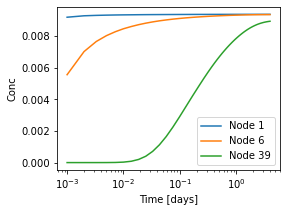

In [10]:
ax=ml.plots.obs_points(data="Conc")
ax.set_xscale('log')

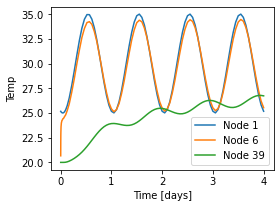

In [11]:
ax=ml.plots.obs_points(data="Temp")

<AxesSubplot:xlabel='T [°C]', ylabel='Depth [cm]'>

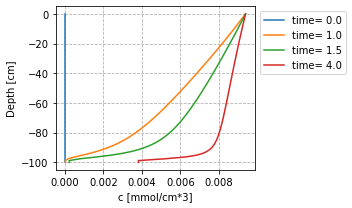

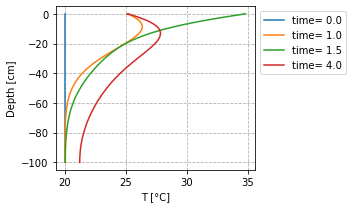

In [12]:
ml.plots.profile_information("Concentration")
ml.plots.profile_information("Temperature")